<a href="https://colab.research.google.com/github/jonruida/PFM-and-PEFM-for-Image-Anomaly-Detection-and-Segmentation/blob/main/VGG16_Transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import zipfile
import os

# URL del archivo en Dropbox (modificada para descarga directa)
dropbox_url = "https://www.dropbox.com/scl/fi/7vd2tqg5tduieq0bk7k6f/ZgZ_s3.zip?rlkey=70iefk1dtwva3py1fbrz444h7&st=mvqw6fpd&dl=1"


In [2]:

# Ruta donde se guardará el archivo descargado
zip_path = '/content/ZgZ_s3.zip'

# Ruta donde se extraerá el contenido del ZIP
extract_path = "/content/data"

# Crear el directorio de extracción si no existe
os.makedirs(extract_path, exist_ok=True)

# Descargar el archivo desde Dropbox
try:
    response = requests.get(dropbox_url)
    response.raise_for_status()  # Verificar si la descarga fue exitosa
    with open(zip_path, 'wb') as file:
        file.write(response.content)
    print("Descarga exitosa.")
except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo: {e}")
    raise

# Verificar si el archivo descargado es un archivo ZIP válido y extraerlo
if zipfile.is_zipfile(zip_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print("Extracción exitosa.")
    except zipfile.BadZipFile:
        print("Error: El archivo no es un archivo ZIP válido o está corrupto.")
    except Exception as e:
        print(f"Error inesperado durante la extracción: {e}")
else:
    print("Error: El archivo descargado no es un archivo ZIP válido.")


Descarga exitosa.
Extracción exitosa.


Convertir a PNG

In [3]:
from PIL import Image
import os
import glob

def convertir_a_png(imagen_path, output_dir):
    imagen = Image.open(imagen_path)
    base_nombre = os.path.basename(imagen_path).split(".")[0]
    output_path = os.path.join(output_dir, f"{base_nombre}.png")
    imagen.save(output_path, "PNG")
    return output_path

# Directorios de entrada y salida
malignas_path = '/content/data/Malignos--Output_S3/imgS3_rois'
benignas_path = '/content/data/PAPANICOL--Output_S3/imgS3_rois'
output_dir_malignas = '/content/data/Malignos--Output_S3/imgS3_rois_png'
output_dir_benignas = '/content/data/PAPANICOL--Output_S3/imgS3_rois_png'

# Crear los directorios de salida si no existen
os.makedirs(output_dir_malignas, exist_ok=True)
os.makedirs(output_dir_benignas, exist_ok=True)

# Convertir imágenes malignas a PNG
for img_path in glob.glob(os.path.join(malignas_path, '*.tif')):
    convertir_a_png(img_path, output_dir_malignas)

# Convertir imágenes benignas a PNG
for img_path in glob.glob(os.path.join(benignas_path, '*.tif')):
    convertir_a_png(img_path, output_dir_benignas)



Trocear imagenes

In [4]:
import os
import random
import shutil
from PIL import Image
import glob

# Directorios de origen
dir_sin_anomalias = '/content/data/PAPANICOL--Output_S3/imgS3_rois_png'
dir_con_anomalias = '/content/data/Malignos--Output_S3/imgS3_rois_png'

# Directorios de destino
dir_test = '/content/data/test'
dir_train = '/content/data/train'

# Crear directorios de test y train si no existen
os.makedirs(dir_test, exist_ok=True)
os.makedirs(dir_train, exist_ok=True)

# Listar imágenes sin anomalías
imagenes_sin_anomalias = [
    "10.png", "19.png", "27.png", "35.png", "43.png", "51.png", "5.png", "68.png", "76.png", "84.png", "92.png",
    "11.png", "1.png", "28.png", "36.png", "44.png", "52.png", "60.png", "69.png", "77.png", "85.png", "93.png",
    "12.png", "20.png", "29.png", "37.png", "45.png", "53.png", "61.png", "6.png", "78.png", "86.png", "94.png",
    "13.png", "21.png", "2.png", "38.png", "46.png", "54.png", "62.png", "70.png", "79.png", "87.png", "95.png",
    "14.png", "22.png", "30.png", "39.png", "47.png", "55.png", "63.png", "71.png", "7.png", "88.png", "96.png",
    "15.png", "23.png", "31.png", "3.png", "48.png", "56.png", "64.png", "72.png", "80.png", "89.png", "97.png",
    "16.png", "24.png", "32.png", "40.png", "49.png", "57.png", "65.png", "73.png", "81.png", "8.png", "98.png",
    "17.png", "25.png", "33.png", "41.png", "4.png", "58.png", "66.png", "74.png", "82.png", "90.png", "9.png",
    "18.png", "26.png", "34.png", "42.png", "50.png", "59.png", "67.png", "75.png", "83.png", "91.png"
]

# Listar imágenes con anomalías
imagenes_con_anomalias = [
    "1005124.png", "1005129.png", "1005133.png", "1005207.png", "1005211.png", "1005215.png",
    "1005126.png", "1005130.png", "1005134.png", "1005208.png", "1005212.png",
    "1005127.png", "1005131.png", "1005205.png", "1005209.png", "1005213.png",
    "1005128.png", "1005132.png", "1005206.png", "1005210.png", "1005214.png"
]

# Seleccionar aleatoriamente 21 imágenes sin anomalías para el test
imagenes_sin_anomalias_test = random.sample(imagenes_sin_anomalias, 21)
# Las restantes serán para el entrenamiento
imagenes_sin_anomalias_train = list(set(imagenes_sin_anomalias) - set(imagenes_sin_anomalias_test))

# Copiar imágenes sin anomalías a los directorios correspondientes
for img in imagenes_sin_anomalias_test:
    shutil.copy(os.path.join(dir_sin_anomalias, img), os.path.join(dir_test, img))

for img in imagenes_sin_anomalias_train:
    shutil.copy(os.path.join(dir_sin_anomalias, img), os.path.join(dir_train, img))

# Copiar imágenes con anomalías al directorio de test
for img in imagenes_con_anomalias:
    shutil.copy(os.path.join(dir_con_anomalias, img), os.path.join(dir_test, img))

# Función para trocear una imagen en N partes
def trocear_imagen(imagen_path, filas, columnas, output_dir):
    imagen = Image.open(imagen_path)
    anchura, altura = imagen.size

    altura_trozo = altura // filas
    anchura_trozo = anchura // columnas

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i in range(filas):
        for j in range(columnas):
            trozo = imagen.crop((j * anchura_trozo, i * altura_trozo, (j + 1) * anchura_trozo, (i + 1) * altura_trozo))
            trozo.save(os.path.join(output_dir, f'{os.path.basename(imagen_path).split(".")[0]}_{i}_{j}.png'))

# Parámetros para trocear
filas = 34
columnas = 34

# Trocear imágenes del conjunto de entrenamiento
output_dir_train_troceadas = os.path.join(dir_train, 'good')
for img_path in glob.glob(os.path.join(dir_train, '*.png')):
    trocear_imagen(img_path, filas, columnas, output_dir_train_troceadas)

# Trocear imágenes del conjunto de test
output_dir_test_troceadas = os.path.join(dir_test, 'good')
for img_path in glob.glob(os.path.join(dir_test, '*.png')):
    trocear_imagen(img_path, filas, columnas, output_dir_test_troceadas)


In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

# Agrega una capa GlobalAveragePooling2D seguida de una capa Dense con 32 unidades
model = keras.models.Sequential([
    conv_base,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(32, activation='sigmoid')
])
# model = conv_base
model.summary()

import numpy as np

# Función para cargar imágenes y extraer características
def extract_features(directory, sample_count):
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        directory,
        target_size=(180, 180),
        batch_size=20,
        class_mode=None,  # sin etiquetas
        shuffle=False)

    features = np.zeros(shape=(sample_count, 32))  # Ajustar la dimensión según la salida deseada
    # features = np.zeros(shape=(sample_count, 5, 5, 512))  # Ajustar según la salida de VGG16
    filenames = []  # Lista para almacenar los nombres de las imágenes
    i = 0
    for inputs_batch in generator:
        features_batch = model.predict(inputs_batch)
        features[i * 20: (i + 1) * 20] = features_batch
        filenames.extend(generator.filenames[i * 20: (i + 1) * 20])  # Agregar nombres de archivos al final de la lista
        i += 1
        if i * 20 >= sample_count:
            break
    return features, filenames
train_dir = '/content/data/train'
test_dir = '/content/data/test'

# Asumimos que conocemos el número de imágenes en cada conjunto
num_train_samples = len(glob.glob(train_dir + '/good/*.png'))
num_test_samples = len(glob.glob(test_dir + '/good/*.png'))

# Modificación en la llamada a la función extract_features
train_features, train_filenames = extract_features(train_dir, num_train_samples)
test_features, test_filenames = extract_features(test_dir, num_test_samples)

# Imprime las formas de las características extraídas
print(f'Train features shape: {train_features.shape}')
print(f'Test features shape: {test_features.shape}')


Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 2s 2s/step
Found 48552 images belonging to 1 classes.
1/1 [==============================] - 0s 28ms/step
Train features shape: (89012, 32)
Test features shape: (48552, 32)


In [9]:
import numpy as np
from sklearn.svm import OneClassSVM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Parámetro para ajustar la sensibilidad del SVM One-Class
nu = 0.01  # Puedes probar valores más bajos como 0.05 o 0.01 para menos sensibilidad

# Creamos y entrenamos el modelo One-Class SVM con el nuevo valor de `nu`
svm_model = OneClassSVM(kernel='rbf', gamma='scale', nu=nu)

# # Creamos y entrenamos el modelo One-Class SVM
# svm_model = OneClassSVM(kernel='rbf', gamma='scale')
svm_model.fit(train_features.reshape(train_features.shape[0], -1))  # Aplanar las características

# Construimos un modelo simple de TensorFlow
model = Sequential([
    Flatten(input_shape=train_features.shape[1:]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilamos el modelo (utiliza el optimizador y la función de pérdida apropiados para tu problema)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo en los datos de características
model.fit(train_features, np.ones(train_features.shape[0]), epochs=10, batch_size=32)


Epoch 1/10
2782/2782 [==============================] - 8s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 2/10
2782/2782 [==============================] - 7s 2ms/step - loss: 3.1114e-07 - accuracy: 1.0000
Epoch 3/10
2782/2782 [==============================] - 7s 2ms/step - loss: 4.9897e-08 - accuracy: 1.0000
Epoch 4/10
2782/2782 [==============================] - 7s 2ms/step - loss: 2.3279e-08 - accuracy: 1.0000
Epoch 5/10
2782/2782 [==============================] - 7s 2ms/step - loss: 2.0461e-08 - accuracy: 1.0000
Epoch 6/10
2782/2782 [==============================] - 7s 2ms/step - loss: 1.8754e-08 - accuracy: 1.0000
Epoch 7/10
2782/2782 [==============================] - 7s 2ms/step - loss: 1.7627e-08 - accuracy: 1.0000
Epoch 8/10
2782/2782 [==============================] - 7s 2ms/step - loss: 1.7100e-08 - accuracy: 1.0000
Epoch 9/10
2782/2782 [==============================] - 7s 2ms/step - loss: 1.6648e-08 - accuracy: 1.0000
Epoch 10/10
2782/2782 [===========================

In [10]:
# Inferencia con el modelo One-Class SVM
svm_predictions = svm_model.predict(test_features.reshape(test_features.shape[0], -1))



print("SVM Predictions:", svm_predictions)


SVM Predictions: [1 1 1 ... 1 1 1]


In [11]:
# Encontrar índices de muestras anómalas para el modelo One-Class SVM
anomaly_indices_svm = np.where(svm_predictions == -1)[0]
# Encontrar nombres de muestras anómalas para el modelo One-Class SVM
anomaly_names_svm = [test_filenames[index] for index in anomaly_indices_svm]

# Contar el número de muestras anómalas para cada modelo
num_anomalies_svm = len(anomaly_names_svm)

# Contar el número de muestras anómalas para cada modelo
total= len(test_features)

print("Número toatl muestras test:", total)

print("Número de anomalías detectadas por el modelo One-Class SVM:", num_anomalies_svm)

# Mostrar los nombres de las muestras anómalas
print("Nombres de las muestras anómalas para el modelo One-Class SVM:", anomaly_names_svm)


Número toatl muestras test: 48552
Número de anomalías detectadas por el modelo One-Class SVM: 281
Nombres de las muestras anómalas para el modelo One-Class SVM: ['good/1005124_15_13.png', 'good/1005124_15_14.png', 'good/1005124_23_18.png', 'good/1005126_10_26.png', 'good/1005126_15_17.png', 'good/1005126_15_5.png', 'good/1005126_18_17.png', 'good/1005126_24_28.png', 'good/1005126_7_23.png', 'good/1005126_9_26.png', 'good/1005127_10_15.png', 'good/1005127_14_19.png', 'good/1005127_14_20.png', 'good/1005127_15_21.png', 'good/1005128_20_6.png', 'good/1005129_20_14.png', 'good/1005130_13_28.png', 'good/1005130_15_27.png', 'good/1005130_15_29.png', 'good/1005130_18_27.png', 'good/1005130_20_28.png', 'good/1005130_22_14.png', 'good/1005130_23_23.png', 'good/1005130_26_5.png', 'good/1005130_31_5.png', 'good/1005131_25_26.png', 'good/1005131_27_13.png', 'good/1005132_16_7.png', 'good/1005133_17_19.png', 'good/1005133_17_2.png', 'good/1005133_19_2.png', 'good/1005133_22_13.png', 'good/1005133_2

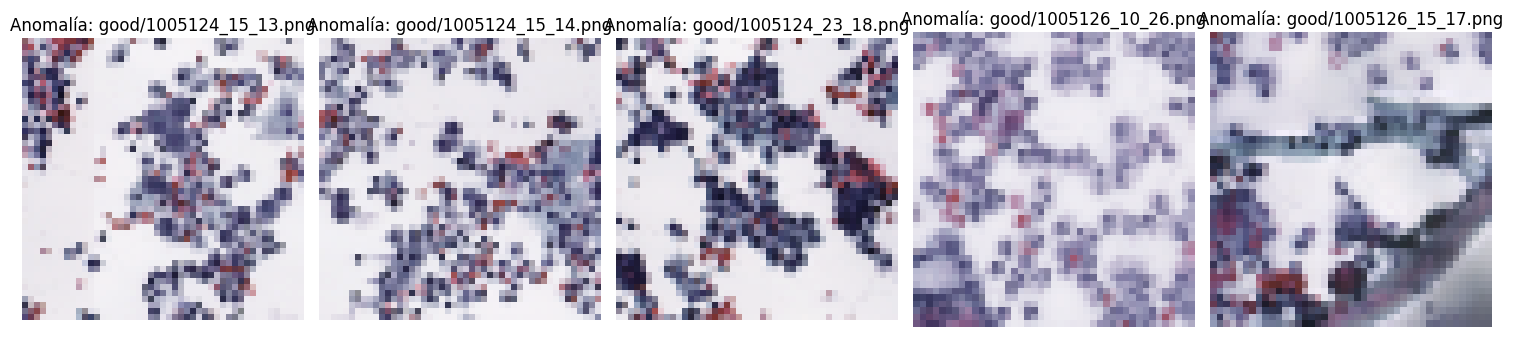

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Función para cargar y mostrar imágenes anómalas
def mostrar_imagenes_anomalas(anomaly_names, dir_path, num_imagenes=5):
    """
    Visualiza algunas imágenes anómalas.

    :param anomaly_names: Lista de nombres de archivos de imágenes anómalas
    :param dir_path: Ruta a la carpeta que contiene las imágenes
    :param num_imagenes: Número de imágenes a mostrar
    """
    # Limitar el número de imágenes a mostrar al menor entre num_imagenes y la cantidad total de anomalías detectadas
    num_imagenes = min(num_imagenes, len(anomaly_names))

    plt.figure(figsize=(15, 15))

    for i in range(num_imagenes):
        filename = anomaly_names[i]
        image_path = os.path.join(dir_path, filename)
        image = Image.open(image_path)

        plt.subplot(1, num_imagenes, i + 1)
        plt.imshow(image)
        plt.title(f'Anomalía: {filename}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Mostrar 5 imágenes anómalas detectadas por el modelo One-Class SVM
mostrar_imagenes_anomalas(anomaly_names_svm, dir_test, num_imagenes=5)
